Here we look at the ERTs created for the venues, referees and advisors.

In [38]:
import json
from matplotlib import pyplot as plt
import matplotlib
from collections import Counter
import numpy as np

In [43]:
font = {'family': 'normal', 'weight': 'normal', 'size': 20}
matplotlib.rc('font', **font)

In [2]:
venues = json.load(open('../data/json/dim/all/ert/venue_erts.json'))
advisors = json.load(open('../data/json/dim/all/ert/advisor_erts.json'))
referees = json.load(open('../data/json/dim/all/ert/referee_erts.json'))

In [3]:
len(venues), len(advisors), len(referees)

(4253, 1093, 4418)

In [23]:
venues_cnt = Counter([len(v['ids']) for v in venues.values()])
advisors_cnt = Counter([len(v['ids']) for v in advisors.values()])
referees_cnt = Counter([len(v['ids']) for v in referees.values()])

In [29]:
venue_y = [tup[1] for tup in sorted(venues_cnt.items(), key=lambda item: item[0])]
advisor_y = [tup[1] for tup in sorted(advisors_cnt.items(), key=lambda item: item[0])]
referee_y = [tup[1] for tup in sorted(referees_cnt.items(), key=lambda item: item[0])]

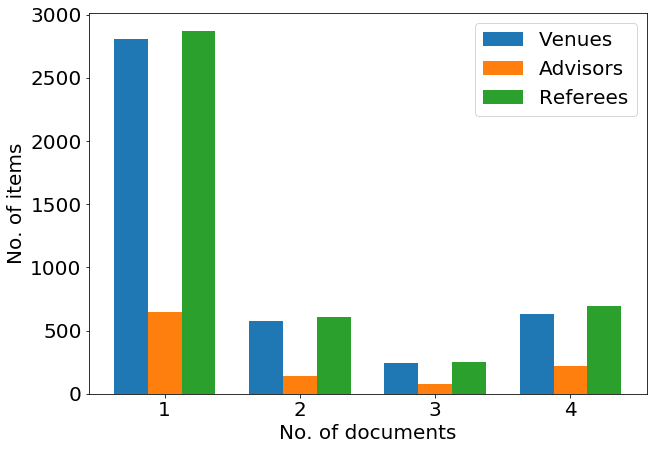

In [48]:
x = np.array([1, 2, 3, 4])
width = .25
plt.figure(figsize=(10,7))
plt.bar(x-width, venue_y, width, label='Venues')
plt.bar(x, advisor_y, width, label='Advisors')
plt.bar(x+width, referee_y, width, label='Referees')
plt.ylabel('No. of items')
plt.xlabel('No. of documents')
plt.xticks(x, [1,2,3,4])
plt.legend()
plt.show()

In [50]:
for cnt in (venues_cnt, advisors_cnt, referees_cnt):
  for n_docs, val in cnt.items():
    print(f'{n_docs} -> {round(val/sum(cnt.values()), 2)}')
  print()

4 -> 0.15
1 -> 0.66
2 -> 0.14
3 -> 0.06

4 -> 0.2
3 -> 0.07
1 -> 0.59
2 -> 0.13

4 -> 0.16
1 -> 0.65
2 -> 0.14
3 -> 0.06

